In [1]:
# Importing Libraries
from data_loader import load_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

df = load_data()
df_temp = df.copy()
df_temp['payment_method'].fillna('Unknown', inplace=True)

Successful connection to the database.
US data successfully loaded into a Pandas DataFrame.
Number of rows loaded: 1221
Database connection closed.


d:\DATA ANALITICS\Projects_Data_Analyst\PAYMENT_CARD_FRAUD_DETECTION_2025(SQL,PYTHON,POWER_BI)\notebooks\data_loader.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_usa = pd.read_sql_query(query, conn)
C:\Users\darie\AppData\Local\Temp\ipykernel_20472\2785862905.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_temp['payment_method'].fillna('Unknown', inplace=

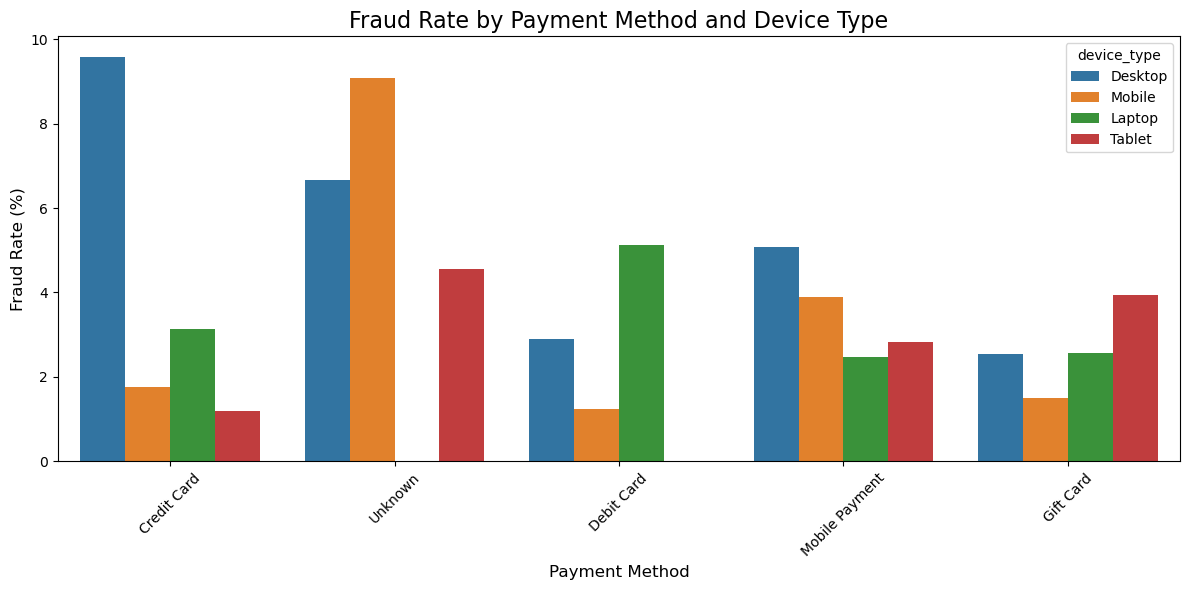

In [3]:
# --- Data Preparation ---
# Group the data by 'payment_method' and 'device_type'
# and aggregate to count total transactions and fraudulent ones.
# The 'fraud_flag' column is assumed to be 1 for fraud and 0 for legitimate.
df_fraud_rates = df_temp.groupby(['payment_method', 'device_type']).agg(
    total_transactions=('transaction_id', 'count'),
    fraud_count=('fraud_flag', 'sum')
).reset_index()

# Calculate the fraud rate as a percentage for each combination
df_fraud_rates['fraud_rate_percentage'] = (df_fraud_rates['fraud_count'] / df_fraud_rates['total_transactions']) * 100

# Sort the DataFrame to highlight the highest fraud rates
df_fraud_rates.sort_values(by='fraud_rate_percentage', ascending=False, inplace=True)

# --- Data Visualization ---
# Set the figure size for a clear and readable plot
plt.figure(figsize=(12, 6))

# Create a bar plot to visualize the fraud rate distribution
# 'hue' is used to show the breakdown by device type within each payment method
sns.barplot(data=df_fraud_rates, x='payment_method', y='fraud_rate_percentage', hue='device_type')

# Add descriptive titles and labels for better readability and context
plt.title('Fraud Rate by Payment Method and Device Type', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Fraud Rate (%)', fontsize=12)

# Rotate x-axis labels to prevent overlap, making them easier to read
plt.xticks(rotation=45)

# Adjust plot layout to ensure all elements fit well
plt.tight_layout()

# Display the final plot
plt.show()